# Title
[]()

In [72]:
import requests
import json
from pandas import json_normalize  
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\src")
from silvhua import *
from custom_nlp import *
import pickle
import os


In [19]:
from FB_scripts import *

In [20]:
with open("credentials.json") as f:
    credentials = json.load(f)

# Pull my IG posts from 2022
Repeat this because in the previous (2023-02-08) notebook, it kept pulling the last page until the number of pages was met, even though the last page of results was reached in fewer pages

In [21]:
df2022, response_json2022 = get_user_ig_post_text(credentials['ig_user_id'], credentials['access_token'],
        pages=50, since='2022-01-01', until='2022-12-31', filename='my_ig_posts_2022_pulled_2023-02-11')

https://graph.facebook.com/v15.0/17841403231458630/media?fields=timestamp%2Ccaption%2Clike_count%2Ccomments_count%2Cmedia_type%2Cmedia_product_type%2Cmedia_url%2Cpermalink%2Cid%2Cthumbnail_url%2Ccomments%7Btimestamp%2Ctext%2Cusername%2Clike_count%2Creplies%7Btimestamp%2Ctext%2Cusername%2Clike_count%7D%7D&since=1641024000.0&until=1672473600.0
Requesting page 1...
	Response status code:  200
Requesting page 2...
	Response status code:  200
Number of posts: 41
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022_pulled_2023-02-11.csv
Time completed: 2023-02-11 18:10:25.600068
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/raw/my_ig_posts_2022_pulled_2023-02-11.sav
Time completed: 2023-02-11 18:10:25.605068


In [23]:
df2022.shape

(41, 11)

# Process post data

In [6]:
def process_df_timestamp(input_df, timestamp_colum='timestamp'):
    """
    Convert dates in the json-derived dataframe from Facebook API read requests
    into different formats.

    Parameters: 
        - input_df : DataFrame with the timestamp of the data.
        - timestamp_column (str): Name of the column with the timestamp.
    """
    df = input_df.reset_index(drop=True)
    regex_date = r'.+T'
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['week_of_year'] = df['timestamp'].dt.isocalendar().week

    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['time'] = df['timestamp'].dt.time
    df['hour'] = df['timestamp'].dt.hour
    return df

In [19]:
process_df_timestamp(df_test).head(3)

,timestamp,caption,like_count,comments_count,media_type,media_product_type,media_url,permalink,id,comments.data,thumbnail_url,date,year,month,week_of_year,day_of_week,time,hour
0,2023-01-30 20:26:58+00:00,I did a lot of quantitative analyses throughou...,7,2,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CoDXzgaS2-g/,17964472544229149,"[{'timestamp': '2023-01-31T05:29:14+0000', 'te...",NaN,2023-01-30,2023,1,5,0,20:26:58,20
1,2023-01-20 19:38:19+00:00,"If you've been to a Lululemon store recently, ...",1,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnpiSZEP982/,18324686224070369,NaN,NaN,2023-01-20,2023,1,3,4,19:38:19,19
2,2023-01-18 18:32:47+00:00,"What’s your favourite fitness tech, app, or se...",0,0,IMAGE,FEED,https://scontent.cdninstagram.com/v/t51.29350-...,https://www.instagram.com/p/CnkRMwXPDRX/,18269437663142607,NaN,NaN,2023-01-18,2023,1,3,2,18:32:47,18


In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
doc = 'am is was squat squatting squats apple apples'
print([wnl.lemmatize(word, pos='v') for word in doc.split()])
print([wnl.lemmatize(word, pos='n') for word in doc.split()])
# doc.split()

['be', 'be', 'be', 'squat', 'squat', 'squat', 'apple', 'apples']
['am', 'is', 'wa', 'squat', 'squatting', 'squat', 'apple', 'apple']


In [22]:
doc2 = [wnl.lemmatize(word, pos='v') for word in doc.split()]
# ''.join([word+' ' for word in doc2])
[wnl.lemmatize(word, pos='n') for word in doc2]

['be', 'be', 'be', 'squat', 'squat', 'squat', 'apple', 'apple']

In [23]:
doc3 = [wnl.lemmatize(word, pos='n') for word in doc.split()]
# ''.join([word+' ' for word in doc2])
[wnl.lemmatize(word, pos='v') for word in doc3]

['be', 'be', 'wa', 'squat', 'squat', 'squat', 'apple', 'apple']

In [27]:
doc_b = 'am is was squat squatting squats apple apples shoulders shouldering posturing running'
doc_b2 = [wnl.lemmatize(word, pos='v') for word in doc_b.split()]
print(doc_b2)
[wnl.lemmatize(word, pos='n') for word in doc_b2]

['be', 'be', 'be', 'squat', 'squat', 'squat', 'apple', 'apples', 'shoulder', 'shoulder', 'posture', 'run']


['be',
 'be',
 'be',
 'squat',
 'squat',
 'squat',
 'apple',
 'apple',
 'shoulder',
 'shoulder',
 'posture',
 'run']

In [29]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
doc_c = 'glute glutes gluteus less'
doc_c2 = [wnl.lemmatize(word, pos='v') for word in doc_c.split()]
[wnl.lemmatize(word, pos='n') for word in doc_c2]

['glute', 'glut', 'gluteus', 'le']

In [30]:
wnl.lemmatize('less', pos='n')

'le'

In [32]:
wnl.lemmatize('glutes', pos='v')

'glut'

## `preprocess_post_text` and `post_preprocessing`

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
import re
import numpy as np
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import unicodedata
from nltk.corpus import stopwords
def preprocess_post_text(doc):
    """
    Prepare data from text documents for NLP:
    - Convert to lowercase
    - Remove formatting
    - Remove all the special characters
    - Remove all single characters
    - Substitute multiple spaces with single space

    Parameters:
    doc (string): Document.

    Returns: Processed doc.
    """
    wnl = WordNetLemmatizer()
    try:
        # Remove apostrophes before tokenization to preserve contractions like "should've"
        doc = re.sub(r"(\b\w+)'(\w+\b)", r'\1\2', doc)

        # Split text into single words (also gets rid of extra white spaces)
        words = word_tokenize(doc)

        # Remove text formatting
        words = [unicodedata.normalize('NFKD', word) for word in words]
        
        # Convert to lower case
        words = [word.lower() for word in words]

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if not word in stop_words]

        # Lemmatize words (must be done after conversion to lower case)
        words = [wnl.lemmatize(word, pos='v') for word in words]
        words = [wnl.lemmatize(word, pos='n') for word in words]
        
        # join words back together as a string
        words = ''.join([word+' ' for word in words])

        # Join @ and # to the subsequent word to retain handles and hashtags
        words = re.sub(r'@ \w+', 'zzzHandle', words)
        words = re.sub(r'# (\w+)', r'zzzHashtag\1', words)

        # Remove any URLs 
        words = re.sub(r'\w*\.+\w*', '', words) # Remove periods in middle of word
        words = re.sub(r'\w*/+\w*', '', words) # remove forward slash in middle of word
        words = re.sub(r'\w*/+\w*', '', words)

        # Replace hypthens with spaces
        words = re.sub(r'(\w+)-(\w+)*', r'\1 \2', words)
        words = re.sub(r'(\w+)-(\w+)*', r'\1 \2', words)

        # Remove numbers
        words = re.sub(r'\d:\d\d[\-a-zA-Z]*','zzzTime', words) # Time of day
        words = re.sub(r'\b\d+\b', 'zzzNumber', words)
        words = re.sub(r'\b\d+\w+\b', 'zzzNumber', words) #Number with letters

        # remove special characters
        non_hashtag_punctuation = ''.join([char for char in string.punctuation if char not in '#@'])
        words = ''.join([char for char in words if char not in non_hashtag_punctuation])

        return words
    except: # In case value is nan
        return 'zzzEmpty'

from sklearn.feature_extraction.text import CountVectorizer
from custom_nlp import *
def post_preprocessing(input_df, text_column='caption', n_top_to_print=10,
    filename=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim', **kwargs):
    """
    Process Instagram post text contained in a dataframe:
    - Preprocess the data by parsing the dates and preprocessing the post captions.
    - Vectorize caption with CountVectorizer.
    - Indicate hashtags.

    Parameters:
        - input_df: DataFrame with the raw data from the API request.
        - text_column (str): Name of the column containing the Instagram caption.
        - n_top_to_print (int): Number of top words to print. Default is 10.
        - filename (str, optional): Name of filename for saving the outputs.
        - path (raw string, optional): Windows directory filepath.
    Optional parmeters: Parameters for CountVectorizer: 
        - token_pattern: Default = r"(?u)\b\w\w+\b"
        - ngram_range: Default = (1,1)
        - max_df, min_df: Default = 1.0, 1
        - max_features: Default = None
    Returns:
        - df: DataFrame of the processed input data.
        - vector_df: DataFrame of the vectors. Each row represents 1 post caption.
        - vect: CountVectorizer object.
    """
    df = process_df_timestamp(input_df)
    df[text_column] = df[text_column].apply(lambda x: preprocess_post_text(x))

    # kwargs
    # stop_words = kwargs.get('stop_words', 'english') # SH 2023-02-11 19:17 remove
    token_pattern = kwargs.get('token_pattern', r"(?u)\b\w\w+\b")
    ngram_range = kwargs.get('ngram_range', (1,1))
    max_df = kwargs.get('max_df', 1.0)
    min_df = kwargs.get('min_df', 1)
    max_features = kwargs.get('max_features', None)
    
    print('Token pattern:', token_pattern)

    vect = CountVectorizer(
            # stop_words=stop_words, # SH 2023-02-11 19:17 remove
            token_pattern=token_pattern,
            ngram_range=ngram_range,
            max_df=max_df,
            min_df=min_df,
            max_features=max_features
        )
    vect.fit(df['caption'])
    vector = vect.transform(df['caption'])
    print('Shape of vector array: ', vector.shape)
    vector_df = pd.DataFrame(vector.toarray(), columns=vect.get_feature_names_out())

    # Replace zzz tags with brackets 
    vector_df.columns = vector_df.columns.str.replace(r'zzzhashtag(\w+)', r'#\1', regex=True)
    vector_df.columns = vector_df.columns.str.replace(r'zzz(\w+)', r'<\1>', regex=True)
    df['caption'] = df['caption'].apply(lambda x: re.sub(r'zzzHashtag(\w+)', r'#\1', x))
    df['caption'] = df['caption'].apply(lambda x: re.sub(r'zzz(\w+)', r'<\1>', x))
    print(f'\nTop {n_top_to_print} words:')
    print(vector_df.sum().sort_values(ascending=False).head(n_top_to_print))
    print('Time processed:', datetime.now())
    if filename:
        try:
            save_csv(df,filename+'_processed',path)
            savepickle(vector_df, filename, path=path)
            savepickle(vect, filename+'_CountVectorizer_object', path=path)
        except:
            print('Unable to save outputs')

    return df, vector_df, vect

# Analyze post insights

In [79]:
path = r'C:\Users\silvh\OneDrive\lighthouse\portfolio-projects\online-PT-social-media-NLP\data\interim'
df2022 = load_csv('my_ig_posts_2022_pulled_2023-02-11.csv', path, column1_as_index=True)

Dataframe shape:  (41, 11)
Time completed: 2023-02-11 20:04:39.660326


In [93]:
df2022.loc[1,'caption'].head(1).values

array(["With power comes responsibility.\n\nIn the fitness space, people get excited about how AI can analyze movement, but what I am most excited about is how to use AI to help people adopt healthier lifestyles--we generally know it's important to exercise, but doing it is challenging.\n\nIf Netflix and YouTube can recommend content you'll find interesting, how can a health app recommend a health practice that you'll adopt to improve your health long term?\n\nThe recommendation will likely need to account for and adapt to your preferences, personality, knowledge/skills, and life stage. It also must be the right level of difficulty: If it's too challenging, you'll get discouraged and give up. If it's too easy, you might not get much benefit or lose motivation.\n\nWhat application of AI are you most excited about? \n\n@aiforgood_foundation"],
      dtype=object)

In [95]:
df2022_processed, count_vector, vect = post_preprocessing(df2022, 
            filename='my_ig_posts_2022_pulled_2023-02-11')

Token pattern: (?u)\b\w\w+\b
Shape of vector array:  (41, 660)

Top 10 words:
<number>    30
time        14
good        11
exercise    11
train        9
get          9
work         9
muscle       9
people       9
day          8
dtype: int64
Time processed: 2023-02-11 20:22:22.976832
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022_pulled_2023-02-11_processed.csv
Time completed: 2023-02-11 20:22:22.997830
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022_pulled_2023-02-11.sav
Time completed: 2023-02-11 20:22:23.001827
File saved:  C:/Users/silvh/OneDrive/lighthouse/portfolio-projects/online-PT-social-media-NLP/data/interim/my_ig_posts_2022_pulled_2023-02-11_CountVectorizer_object.sav
Time completed: 2023-02-11 20:22:23.003850


In [81]:
vect.stop_words_

set()

In [82]:
stopwords = vect.get_stop_words()
print(stopwords)

None


In [83]:
from sklearn.feature_extraction import stop_words

print(stop_words.ENGLISH_STOP_WORDS)

ImportError: cannot import name 'stop_words' from 'sklearn.feature_extraction' (C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\__init__.py)

## `BoW_EDA`

Saved:  C:/Users/silvh/OneDrive/data science job search/content/instagram BoW 2022.png
Time completed: 2023-02-11 18:13:07.812809


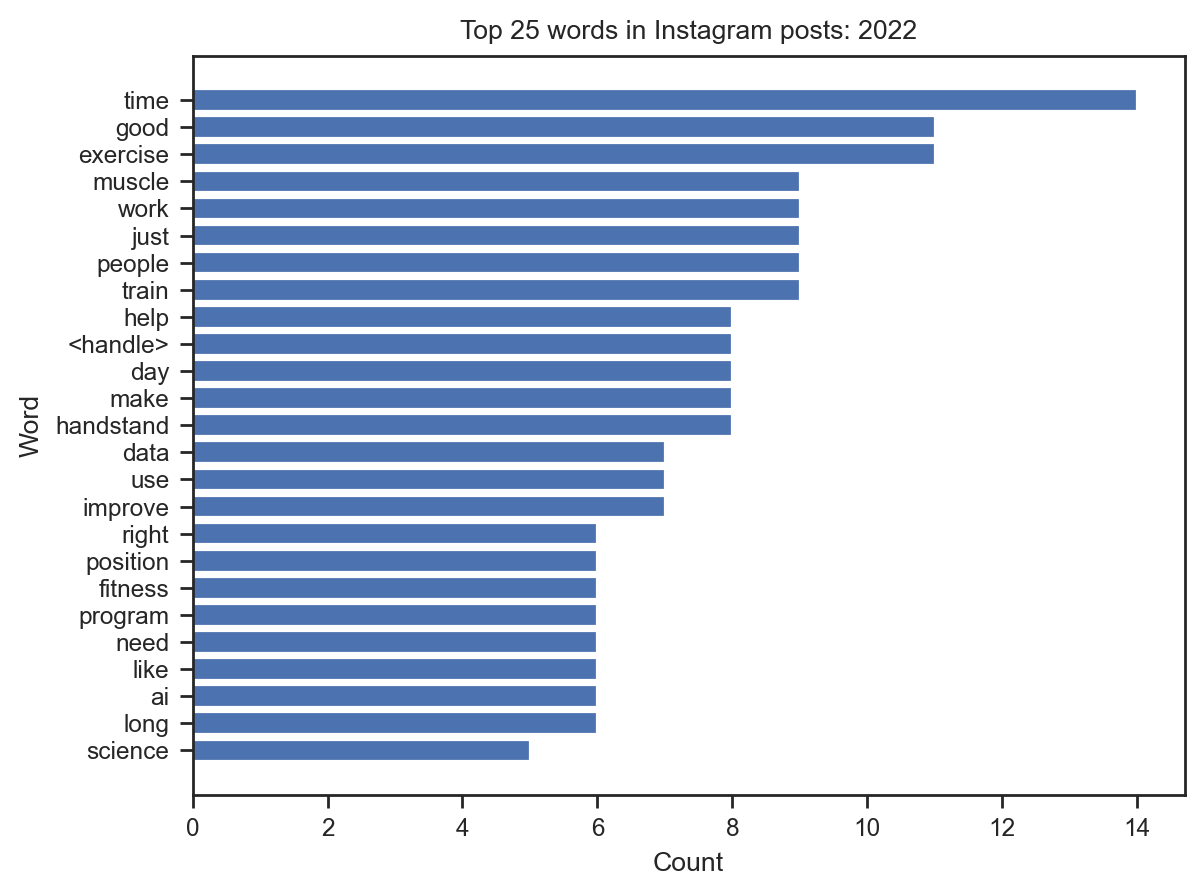

In [25]:
import seaborn as sns
import matplotlib_inline.backend_inline

def BoW_eda(df, n=30, text_column='caption', drop=['<number>'], context='paper', title_suffix=None,
    filename=None, path=r'C:\Users\silvh\OneDrive\data science job search\content'):
    sns.reset_defaults()    
    %matplotlib inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    plt.rcParams['savefig.dpi'] = 300
    
    sns.set_theme(context=context, style='ticks')
    df = df.drop(columns=drop)
    top_n = df.sum().sort_values(ascending=False).head(n).sort_values()
    # ax = sns.barplot(df[top_n.index.tolist()], estimator='sum',errorbar=None) # this works but gives deprecated warning
    fig, ax = plt.subplots()
    ax.barh(top_n.index, top_n)
    ax.set_yticks(top_n.index) # This line suppresses the warning "UserWarning: FixedFormatter should only be used together with FixedLocator"
    # ax.set_yticklabels(top_n.index, rotation=30, ha='right', rotation_mode='anchor')
    title = f'Top {n} words in Instagram posts'
    if title_suffix:
        title = f'{title}: {title_suffix}'
    ax.set(xlabel='Count', ylabel='Word', title=title)
    ax.axis('tight')
    if filename:
        try:
            path = f'{path}/'.replace('\\','/')
            fig.savefig(path+filename, bbox_inches='tight')
            print('Saved: ', path+filename)
        except:
            print('Unable to save outputs')
    print('Time completed:', datetime.now())

    return top_n

top_25 = BoW_eda(count_vector, n=25, title_suffix='2022', filename='instagram BoW 2022.png')

Saved:  C:/Users/silvh/OneDrive/data science job search/content/instagram BoW 2022.png
Time completed: 2023-02-11 20:22:50.413104


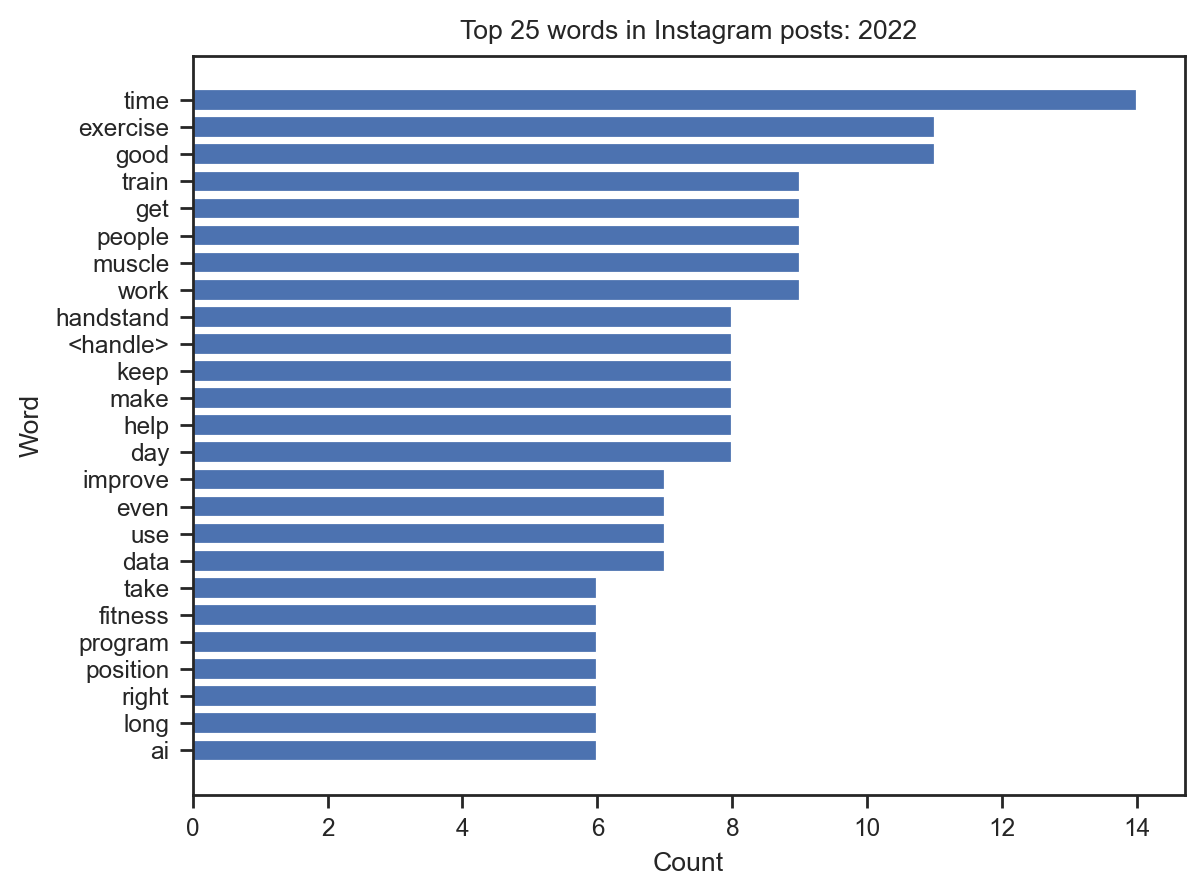

In [96]:
top_25 = BoW_eda(count_vector, n=25, title_suffix='2022', filename='instagram BoW 2022.png')

In [97]:
count_vector.columns.tolist()

['ab',
 'ability',
 'abundance',
 'accept',
 'accord',
 'account',
 'activation',
 'active',
 'activity',
 'adapt',
 'add',
 'adequate',
 'adjust',
 'adopt',
 'advance',
 'afternoon',
 'age',
 'ai',
 'aim',
 'algorithm',
 'align',
 'allow',
 'along',
 'already',
 'also',
 'always',
 'amazon',
 'amount',
 'amusement',
 'analyze',
 'anchor',
 'anf',
 'ankle',
 'announce',
 'anterior',
 'apartment',
 'app',
 'appear',
 'appearance',
 'application',
 'apply',
 'apps',
 'area',
 'arm',
 'armpit',
 'art',
 'artificial',
 'asian',
 'ask',
 'assort',
 'athlete',
 'attempt',
 'audiobook',
 'august',
 'avoid',
 'away',
 'baby',
 'back',
 'balance',
 'banana',
 'band',
 'bang',
 'bare',
 'based',
 'basically',
 'become',
 'benefit',
 'best',
 'better',
 'biggest',
 'bike',
 'bio',
 'bite',
 'bloc',
 'body',
 'bones',
 'book',
 'bother',
 'brain',
 'bread',
 'break',
 'bring',
 'buck',
 'bus',
 'business',
 'butt',
 'butter',
 'cable',
 'cake',
 'cal',
 'calorie',
 'cardio',
 'care',
 'career',
 '

In [98]:
df2022_processed.columns

Index(['timestamp', 'caption', 'like_count', 'comments_count', 'media_type',
       'media_product_type', 'media_url', 'permalink', 'id', 'comments.data',
       'thumbnail_url', 'date', 'year', 'month', 'week_of_year', 'day_of_week',
       'time', 'hour'],
      dtype='object')

In [99]:
print(df2022_processed['media_url'].head(1).values)

['https://scontent.cdninstagram.com/v/t51.29350-15/322778200_3359512214268300_8037939719050379800_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=ufWpuEajkfcAX8VRx99&_nc_oc=AQnMwYgdVNWdFUZlU8ExJKqi0RvQkhMR3M9dE0ckc7Y8fRfKXmWg4Em48WwptGMeaT4-ySscV1qFImp3oe6PZy2d&_nc_ht=scontent.cdninstagram.com&edm=AM6HXa8EAAAA&oh=00_AfDiTBBEdFcujzku_o3pvHLtFAOhcekVRjennaNeqhPVSw&oe=63ED3330']


In [63]:
df2022_processed.groupby(['month']).agg(total_comments_count=('comments_count','sum'), 
                            mean_comments_count=('comments_count','mean'))

,total_comments_count,mean_comments_count
month,,
1,294,2.000000
2,196,0.666667
3,637,4.333333
4,196,4.000000
6,49,0.328859
7,9,1.285714
8,1,0.500000
9,20,4.000000
12,17,1.888889


# *End of Page*